# View slices in the image

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as np
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import os,sys,re

from astropy.io import fits
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec
%matplotlib inline
import pickle
import h5py
import seaborn as sns
import copy
from collections import OrderedDict

In [3]:
import matplotlib.patches as patches

In [36]:
import seaborn as sns
hls_colors = sns.color_palette("hls", 6)

In [4]:
import matplotlib.offsetbox
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

In [5]:
from astropy.io import fits
from matplotlib.colors import LogNorm
from astropy.visualization import ZScaleInterval, ImageNormalize, MinMaxInterval, PowerStretch
from astropy.visualization import (MinMaxInterval, SqrtStretch,ZScaleInterval,PercentileInterval,
                                   ImageNormalize,imshow_norm)
from astropy.visualization.stretch import SinhStretch, LinearStretch,AsinhStretch,LogStretch

    exposure_2022121200395_pseudo-postisrccd.fits exposure_2022121200406_pseudo-postisrccd.fits exposure_2022121200417_pseudo-postisrccd.fits
    exposure_2022121200396_pseudo-postisrccd.fits exposure_2022121200407_pseudo-postisrccd.fits exposure_2022121200418_pseudo-postisrccd.fits
    exposure_2022121200397_pseudo-postisrccd.fits exposure_2022121200408_pseudo-postisrccd.fits exposure_2022121200419_pseudo-postisrccd.fits
    exposure_2022121200398_pseudo-postisrccd.fits exposure_2022121200409_pseudo-postisrccd.fits exposure_2022121200425_pseudo-postisrccd.fits
    exposure_2022121200399_pseudo-postisrccd.fits exposure_2022121200410_pseudo-postisrccd.fits exposure_2022121200426_pseudo-postisrccd.fits
    exposure_2022121200400_pseudo-postisrccd.fits exposure_2022121200411_pseudo-postisrccd.fits exposure_2022121200427_pseudo-postisrccd.fits
    exposure_2022121200401_pseudo-postisrccd.fits exposure_2022121200412_pseudo-postisrccd.fits exposure_2022121200428_pseudo-postisrccd.fits
    exposure_2022121200402_pseudo-postisrccd.fits exposure_2022121200413_pseudo-postisrccd.fits exposure_2022121200429_pseudo-postisrccd.fits
    exposure_2022121200403_pseudo-postisrccd.fits exposure_2022121200414_pseudo-postisrccd.fits exposure_2022121200430_pseudo-postisrccd.fits
    exposure_2022121200404_pseudo-postisrccd.fits exposure_2022121200415_pseudo-postisrccd.fits

In [22]:
directory = "/Users/sylvie/DATA/AuxTelDATA2023/data/2023/empty~holo4_003/20221212"
filename1 = "exposure_2022121200395_pseudo-postisrccd.fits" 
exposure1 = "exposure_2022121200395"

filename2 = "exposure_2022121200398_pseudo-postisrccd.fits" 
exposure2 = "exposure_2022121200398"

filename3 = "exposure_2022121200406_pseudo-postisrccd.fits" 
exposure3 = "exposure_2022121200406"

In [23]:
fullfilename1 = os.path.join(directory,filename1)
fullfilename2 = os.path.join(directory,filename2)
fullfilename3 = os.path.join(directory,filename3)

In [24]:
all_numbers = [395,398,406]
all_exposures = [exposure1,exposure2,exposure3]

In [25]:
all_fitsimages = []

for fullfilename in [fullfilename1,fullfilename2, fullfilename3]:
    with fits.open(fullfilename) as hdul:

        hdul.info()
        fitsimage = hdul[1].data
        all_fitsimages.append(fitsimage)

Filename: /Users/sylvie/DATA/AuxTelDATA2023/data/2023/empty~holo4_003/20221212/exposure_2022121200395_pseudo-postisrccd.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  Segment10     1 PrimaryHDU     477   ()      
  1                1 ImageHDU         7   (4072, 4000)   float32   
Filename: /Users/sylvie/DATA/AuxTelDATA2023/data/2023/empty~holo4_003/20221212/exposure_2022121200398_pseudo-postisrccd.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  Segment10     1 PrimaryHDU     477   ()      
  1                1 ImageHDU         7   (4072, 4000)   float32   
Filename: /Users/sylvie/DATA/AuxTelDATA2023/data/2023/empty~holo4_003/20221212/exposure_2022121200406_pseudo-postisrccd.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  Segment10     1 PrimaryHDU     477   ()      
  1                1 ImageHDU         7   (4072, 4000)   float32   


In [26]:
#transform = AsinhStretch() + PercentileInterval(99.)
transform = PercentileInterval(98.)

In [29]:
rect1 = patches.Rectangle((2360,0), 90, 2700, linewidth=1, edgecolor='r', facecolor='none')
rect2 = patches.Rectangle((2100,0), 90, 2700, linewidth=1, edgecolor='b', facecolor='none')

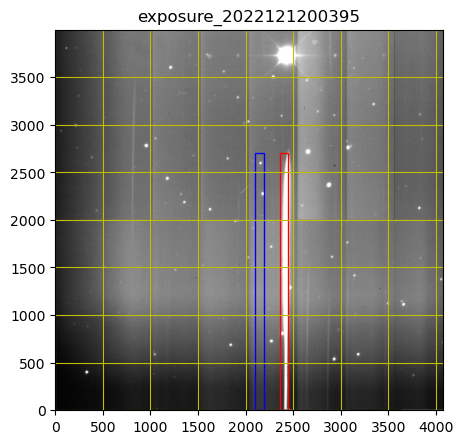

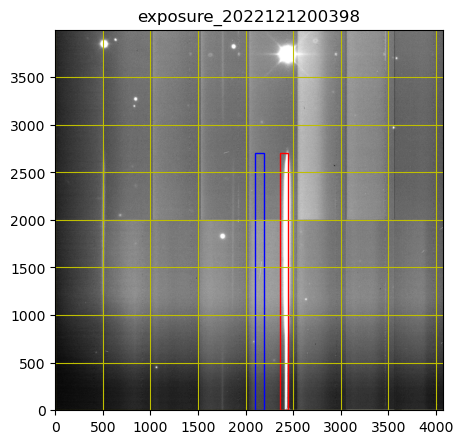

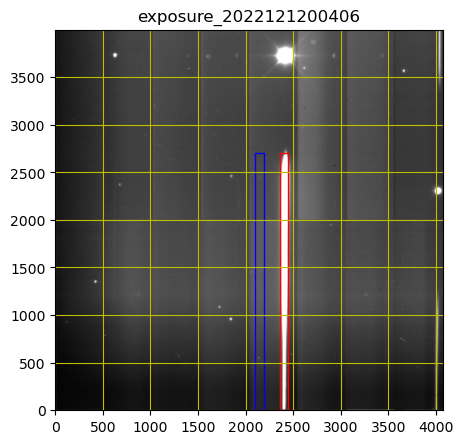

In [32]:
for idx in range(3):
    fig=plt.figure(figsize=(5,5))
    ax=fig.add_subplot(1,1,1)
    ax.imshow(transform(all_fitsimages[idx]),origin="lower",cmap='gray')
    ax.grid(color="y")
    rect1 = patches.Rectangle((2360,0), 90, 2700, linewidth=1, edgecolor='r', facecolor='none')
    rect2 = patches.Rectangle((2100,0), 90, 2700, linewidth=1, edgecolor='b', facecolor='none')
    ax.add_patch(rect1)
    ax.add_patch(rect2)
    ax.set_title(all_exposures[idx])
    plt.show()

In [33]:
all_spectrum2D = []
all_background2D = []

for idx in range(3):
    the_fitsimage = all_fitsimages[idx]
    spectrum2D = the_fitsimage[0:2700,2360:2450]
    background2D = the_fitsimage[0:2700,2100:2190]
    all_spectrum2D.append(spectrum2D)
    all_background2D.append(background2D)

In [13]:
spectrum2D.shape

(2700, 80)

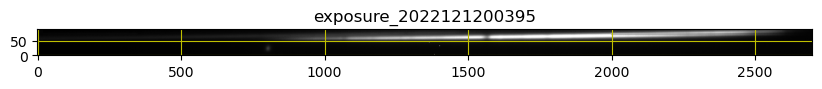

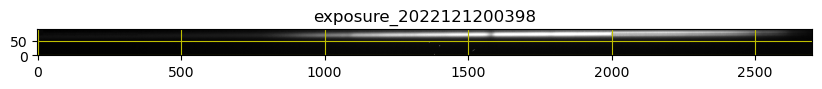

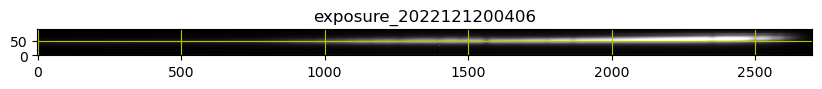

In [34]:
for idx in range(3):
    fig=plt.figure(figsize=(10,5))
    ax=fig.add_subplot(1,1,1)
    ax.imshow(transform(all_spectrum2D[idx].T),origin="lower",cmap='gray')
    ax.grid(color="y")
    ax.set_title(all_exposures[idx])
    plt.show()
    

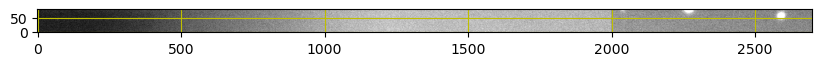

In [15]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(1,1,1)
ax.imshow(transform(background2D.T),origin="lower",cmap='gray')
ax.grid(color="y")

In [38]:
all_spectrum1D = []
all_background1D = []

for idx in range(3):

    spectrum1D = all_spectrum2D[idx].sum(axis=1)
    background1D = all_background2D[idx].sum(axis=1)
    
    all_spectrum1D.append(spectrum1D) 
    all_background1D.append(background1D)

Text(0.5, 1.0, '2022/12/12')

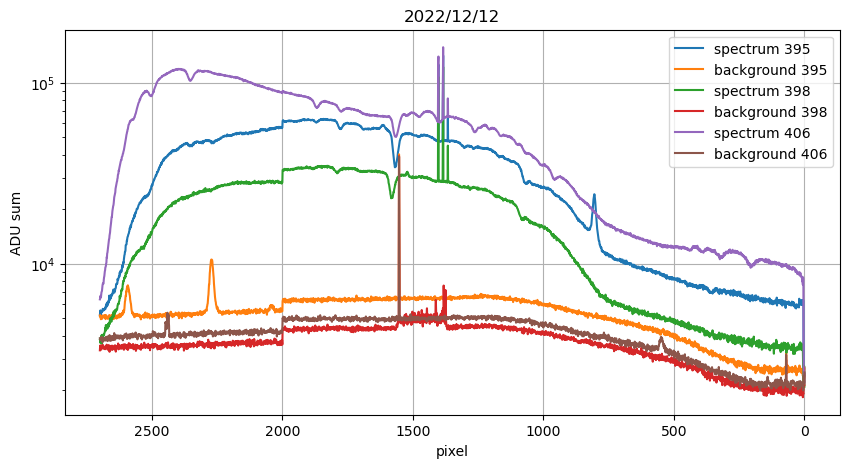

In [40]:
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
for idx in range(3):
    num = all_numbers[idx]
    label_spec = f"spectrum {num}"
    label_bg = f"background {num}"
    ax.plot(all_spectrum1D[idx],label=label_spec)
    ax.plot(all_background1D[idx], label=label_bg)
ax.set_yscale('log')
ax.invert_xaxis()
ax.grid()
ax.set_xlabel("pixel")
ax.set_ylabel("ADU sum")
ax.legend()
ax.set_title("2022/12/12")

Text(0.5, 1.0, '2022/12/12')

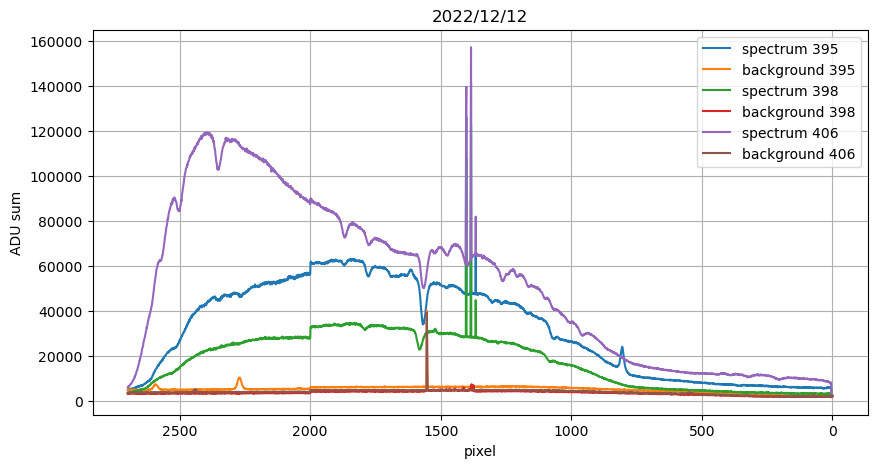

In [42]:
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
for idx in range(3):
    num = all_numbers[idx]
    label_spec = f"spectrum {num}"
    label_bg = f"background {num}"
    ax.plot(all_spectrum1D[idx],label=label_spec)
    ax.plot(all_background1D[idx], label=label_bg)
#ax.set_yscale('log')
ax.invert_xaxis()
ax.grid()
ax.set_xlabel("pixel")
ax.set_ylabel("ADU sum")
ax.legend()
ax.set_title("2022/12/12")

In [19]:
1-55/60

0.08333333333333337